In [12]:
from typing import Tuple

import numpy as np
import sklearn, sklearn.model_selection, sklearn.datasets
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [13]:
data = sklearn.datasets.fetch_california_housing(as_frame=True).frame
x_keys = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
y_key = 'MedHouseVal'
data[y_key] = data[y_key] > data[y_key].mean()

In [14]:
np.random.seed(0) # for reproducibility

a) Split the data set into training (80%) and test set (20%).  

In [15]:
X = data[x_keys].to_numpy()
y = data[y_key].to_numpy()

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

Implement the provided template function for fitting a model on the train set and evaluating it on the train and test sets.

In [16]:
import sklearn.metrics


def fit_and_evaluate_model(model) -> Tuple[float, float]:
    """Fit and evaluate a model on the training and test sets.

    Returns:
        Tuple[float, float]: The training and test error.
    """
    # Fit the model on the training set
    model.fit(X_train, y_train)

    # Predict the labels on the training and test sets
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Compute the training and test error
    train_error = 1 - model.score(X_train, y_train)
    test_error = 1 - model.score(X_test, y_test)
    return train_error, test_error

b) Train a decision tree classifier with a maximum depth of 10 on the training set. Compute the error on the train set and the error on the test set.

In [17]:
tree_model = DecisionTreeClassifier(max_depth=10, random_state=0)
train_error, test_error = fit_and_evaluate_model(tree_model)
print(f"Decision Tree Train Error: {train_error}")
print(f"Decision Tree Test Error: {test_error}")

Decision Tree Train Error: 0.08829941860465118
Decision Tree Test Error: 0.15285852713178294


c) Visualize the tree. How many nodes can it have at maximum? How many nodes does your tree have?

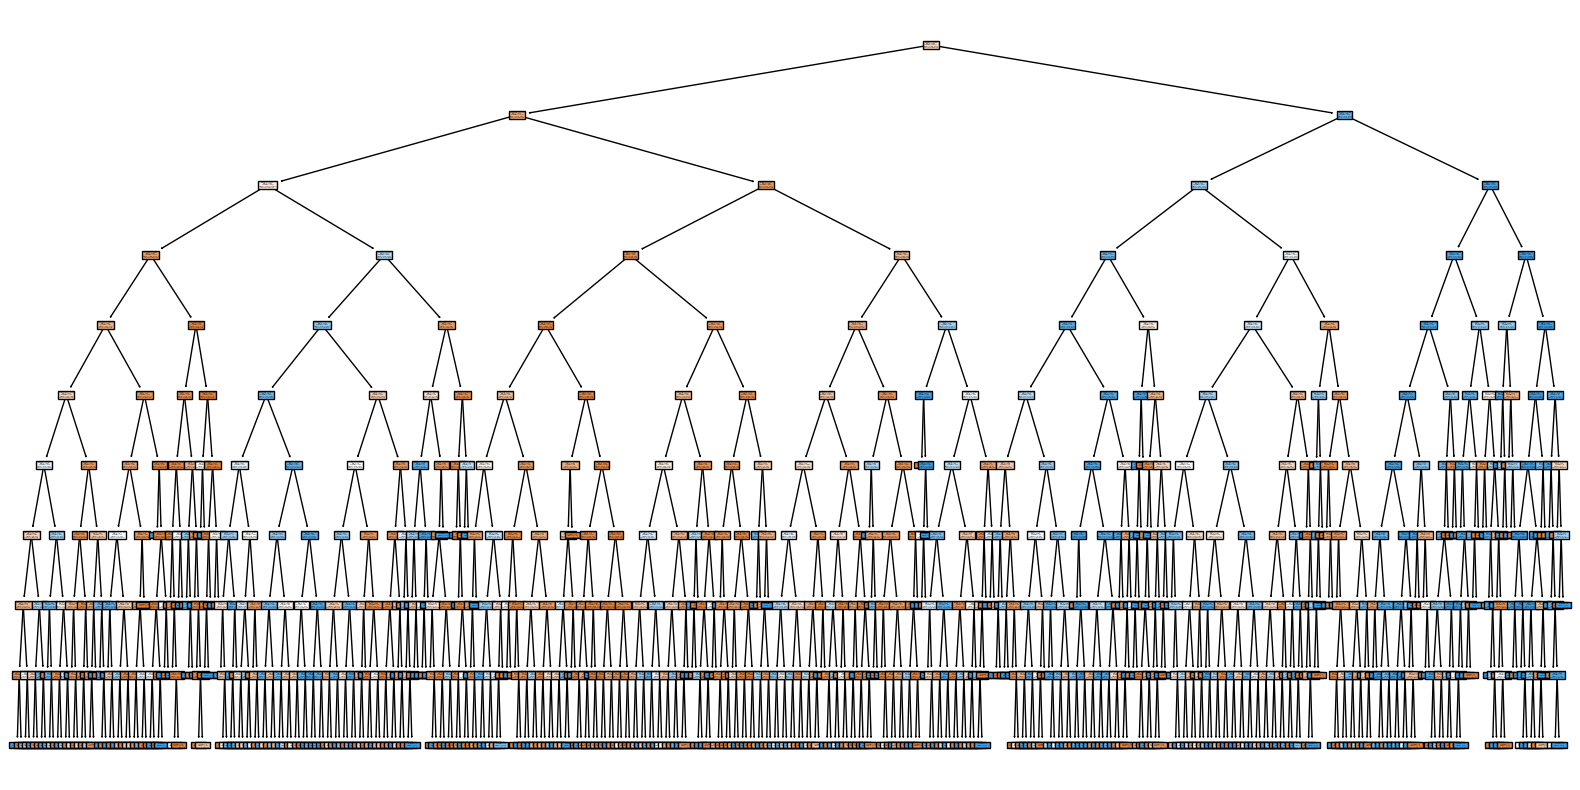

In [18]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=x_keys, class_names=["Below Mean", "Above Mean"], filled=True)
plt.show()

*The number of nodes can grow up to $\sum_{i = 1}^{10} 2^{i-1} = 2^{10} - 1 = 1023$.*

In [19]:
max_nodes = (2 ** (tree_model.get_depth() + 1)) - 1
print(f"Maximum nodes at depth 10: {max_nodes}")

actual_nodes = tree_model.tree_.node_count
print(f"Actual nodes in the tree: {actual_nodes}")

Maximum nodes at depth 10: 2047
Actual nodes in the tree: 993


c) Train multiple trees with depths between 1 and 30 and visualize the training and test errors.
What do you observe?

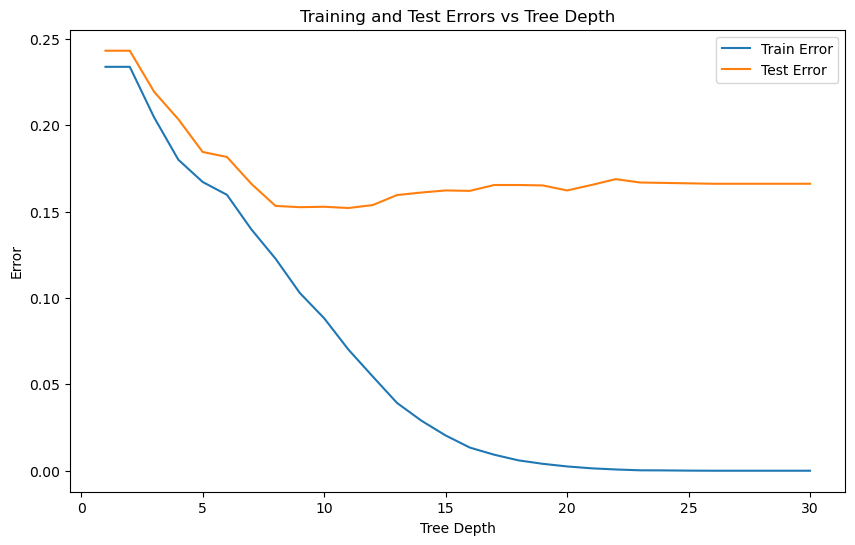

In [20]:
train_errors = []
test_errors = []

for depth in range(1, 31):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
    clf.fit(X_train, y_train)
    train_errors.append(1 - clf.score(X_train, y_train))
    test_errors.append(1 - clf.score(X_test, y_test))

# Plot the errors
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), train_errors, label="Train Error")
plt.plot(range(1, 31), test_errors, label="Test Error")
plt.xlabel("Tree Depth")
plt.ylabel("Error")
plt.legend()
plt.title("Training and Test Errors vs Tree Depth")
plt.show()

d) Train a bagging classifier with 10 trees of maximum depth 10. Compute the train and test errors.

In [23]:
bag_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=10),
    n_estimators=10,
    random_state=0
)
bag_clf.fit(X_train, y_train)

train_error_bag = 1 - bag_clf.score(X_train, y_train)
test_error_bag = 1 - bag_clf.score(X_test, y_test)

print(f"Bagging Train Error: {train_error_bag}")
print(f"Bagging Test Error: {test_error_bag}")

Bagging Train Error: 0.07473352713178294
Bagging Test Error: 0.13275193798449614


Train multiple bagging classifiers with 1 to 30 base estimators, each of depth 10. Visualize the curves for training and test errors.

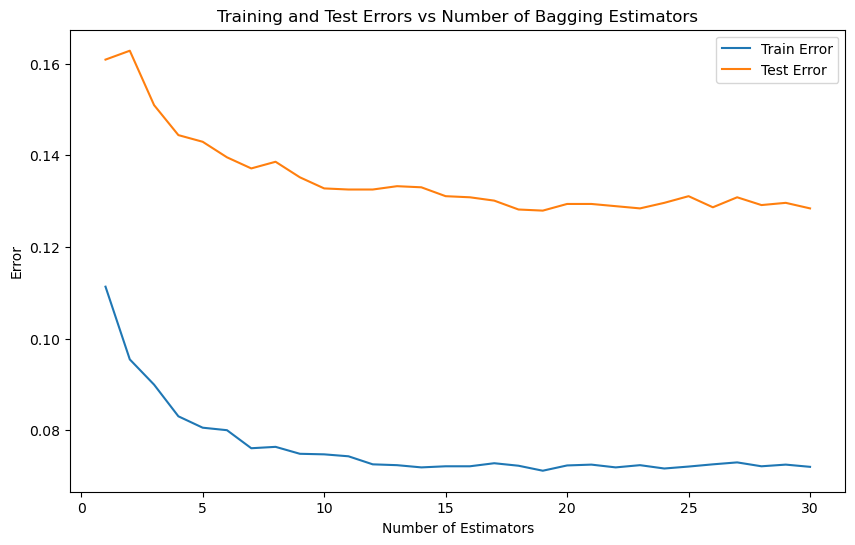

In [24]:
# Varying the number of estimators
train_errors_bag = []
test_errors_bag = []

for n_estimators in range(1, 31):
    bag_clf = BaggingClassifier(
        estimator=DecisionTreeClassifier(max_depth=10),
        n_estimators=n_estimators,
        random_state=0
    )
    bag_clf.fit(X_train, y_train)
    train_errors_bag.append(1 - bag_clf.score(X_train, y_train))
    test_errors_bag.append(1 - bag_clf.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), train_errors_bag, label="Train Error")
plt.plot(range(1, 31), test_errors_bag, label="Test Error")
plt.xlabel("Number of Estimators")
plt.ylabel("Error")
plt.legend()
plt.title("Training and Test Errors vs Number of Bagging Estimators")
plt.show()

e) Train a boosting classifier (`sklearn.ensemble.AdaBoostClassifier`) with 10 trees of maximum depth 10. Compute the train and test errors.

In [25]:
boost_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=5),
    n_estimators=10,
    random_state=0
)
boost_clf.fit(X_train, y_train)

train_error_boost = 1 - boost_clf.score(X_train, y_train)
test_error_boost = 1 - boost_clf.score(X_test, y_test)

print(f"Boosting Train Error: {train_error_boost}")
print(f"Boosting Test Error: {test_error_boost}")

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Boosting Train Error: 0.09429505813953487
Boosting Test Error: 0.125484496124031


Train multiple boosting classifiers with 1 to 30 base estimators, each of depth 5. Visualize the curves for training and test errors.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

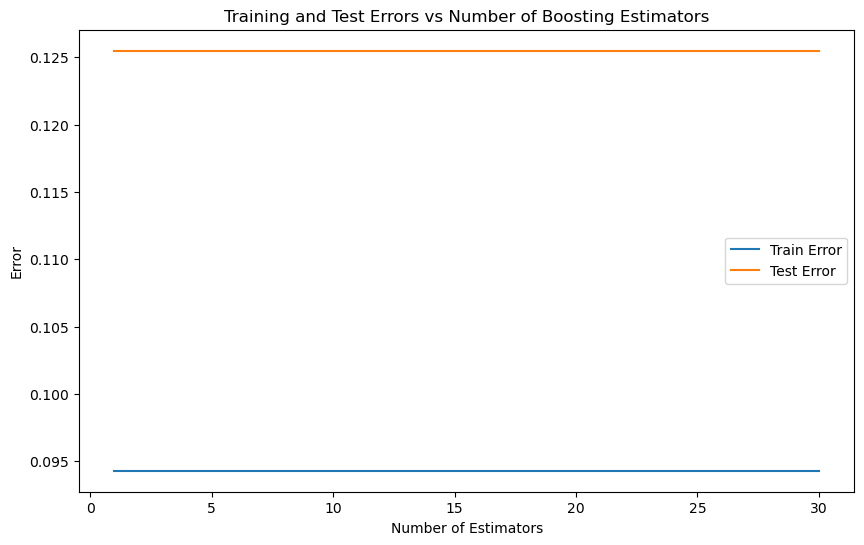

In [26]:
train_errors_boost = []
test_errors_boost = []

for n_estimators in range(1, 31):
    boost_clf = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=5),
        n_estimators=10,
        random_state=0
    )
    boost_clf.fit(X_train, y_train)
    train_errors_boost.append(1 - boost_clf.score(X_train, y_train))
    test_errors_boost.append(1 - boost_clf.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), train_errors_boost, label="Train Error")
plt.plot(range(1, 31), test_errors_boost, label="Test Error")
plt.xlabel("Number of Estimators")
plt.ylabel("Error")
plt.legend()
plt.title("Training and Test Errors vs Number of Boosting Estimators")
plt.show()

f) Train a random forest classifier with 10 trees and max_depth=10. Compute the train and test errors.

In [27]:
rf_clf = RandomForestClassifier(
    max_depth=10, n_estimators=10, random_state=0
)
rf_clf.fit(X_train, y_train)

train_error_rf = 1 - rf_clf.score(X_train, y_train)
test_error_rf = 1 - rf_clf.score(X_test, y_test)

print(f"Random Forest Train Error: {train_error_rf}")
print(f"Random Forest Test Error: {test_error_rf}")

Random Forest Train Error: 0.09011627906976749
Random Forest Test Error: 0.1397771317829457


g) Train multiple random forests with 1 to 30 base estimators, each of depth 5. Visualize the curves for training and test errors.

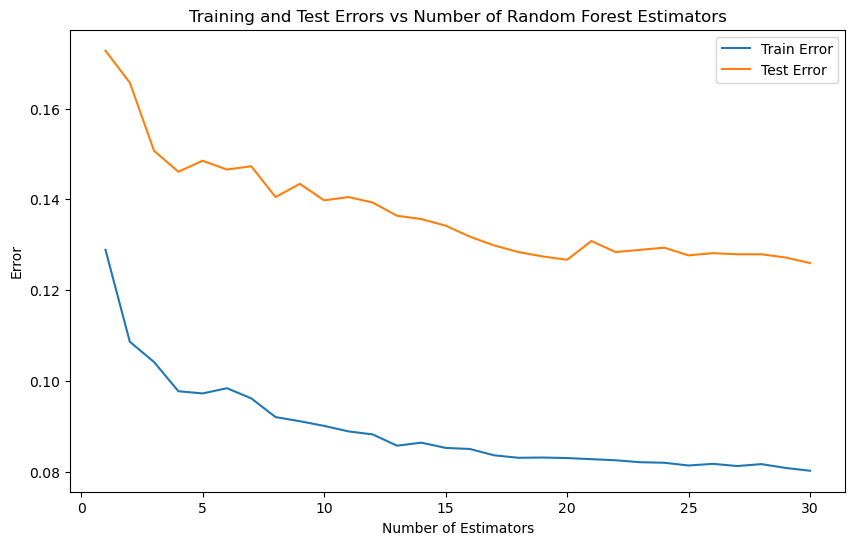

In [28]:
train_errors_rf = []
test_errors_rf = []

for n_estimators in range(1, 31):
    rf_clf = RandomForestClassifier(
        max_depth=10, n_estimators=n_estimators, random_state=0
    )
    rf_clf.fit(X_train, y_train)
    train_errors_rf.append(1 - rf_clf.score(X_train, y_train))
    test_errors_rf.append(1 - rf_clf.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), train_errors_rf, label="Train Error")
plt.plot(range(1, 31), test_errors_rf, label="Test Error")
plt.xlabel("Number of Estimators")
plt.ylabel("Error")
plt.legend()
plt.title("Training and Test Errors vs Number of Random Forest Estimators")
plt.show()